In [77]:
# Import necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import cv2

In [75]:
# Set dataset directory
dataset_dir = '/content/drive/MyDrive/Machine Learning/project/Acne Detection/Dataset/Acne/'

# Get list of image file paths
image_paths = [os.path.join(dataset_dir, fname) for fname in os.listdir(dataset_dir)]

In [79]:
# Define desired image size
img_height, img_width = 100, 100  # Adjust this as needed

# Load and resize images from the dataset
acne_images = []
for p in image_paths:
    img = cv2.imread(p)  # Read the image
    img = cv2.resize(img, (img_width, img_height))  # Resize image
    acne_images.append(img)

# Generate synthetic normal images (random noise)
synthetic_normal_images = []
for _ in range(len(acne_images)):
    noise_image = np.random.rand(img_height, img_width, 3) * 255  # Create a random noise image
    synthetic_normal_images.append(noise_image.astype(np.uint8))  # Convert to uint8

# Labels
labels_acne = np.ones(len(acne_images))  # Label for acne images
labels_normal = np.zeros(len(synthetic_normal_images))  # Label for normal images

# Combine images and labels
all_images = np.array(synthetic_normal_images + acne_images)
all_labels = np.concatenate((labels_normal, labels_acne))

# Split dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(all_images, all_labels, test_size=0.2, random_state=42)

# Check the shape of the dataset
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(2932, 100, 100, 3) (734, 100, 100, 3) (2932,) (734,)


In [80]:
# Data augmentation
datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fit data generator
datagen.fit(X_train)

In [81]:
# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [82]:
# Train the model
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    validation_data=(X_val / 255.0, y_val),
                    epochs=10)  # Adjust epochs as needed

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


92/92 ━━━━━━━━━━━━━━━━━━━━ 81s 843ms/step - accuracy: 0.9234 - loss: 0.1766 - val_accuracy: 1.0000 - val_loss: 3.6724e-05
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 81s 839ms/step - accuracy: 1.0000 - loss: 4.6056e-06 - val_accuracy: 1.0000 - val_loss: 2.8898e-07
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 75s 814ms/step - accuracy: 1.0000 - loss: 2.0735e-06 - val_accuracy: 1.0000 - val_loss: 4.2885e-07
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 78s 834ms/step - accuracy: 1.0000 - loss: 7.9670e-07 - val_accuracy: 1.0000 - val_loss: 5.8353e-07
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 77s 826ms/step - accuracy: 1.0000 - loss: 1.2458e-06 - val_accuracy: 1.0000 - val_loss: 2.6167e-07
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 81s 873ms/step - accuracy: 1.0000 - loss: 1.0288e-06 - val_accuracy: 1.0000 - val_loss: 2.5315e-07
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 80s 867ms/step - accuracy: 1.0000 - loss: 4.7595e-07 - val_accuracy: 1.0000 - val_loss: 2.7247e-07
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 73s 789ms/step - a

In [83]:
# Evaluate the model
loss, accuracy = model.evaluate(X_val / 255.0, y_val)
print(f'Validation Loss: {loss:.4f}, Validation Accuracy: {accuracy:.4f}')

23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 231ms/step - accuracy: 1.0000 - loss: 7.9251e-08
Validation Loss: 0.0000, Validation Accuracy: 1.0000


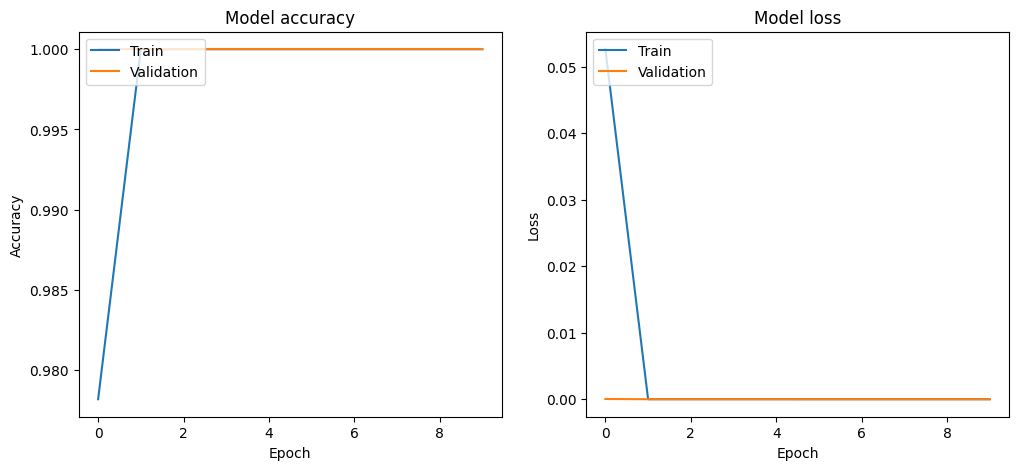

In [84]:
# Plotting accuracy and loss
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [85]:
# Evaluate the model on validation data
val_loss, val_accuracy = model.evaluate(X_val / 255.0, y_val)
print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}')

# Predictions on validation set
y_val_pred = model.predict(X_val / 255.0)
y_val_pred_classes = (y_val_pred > 0.5).astype(int).flatten()  # Convert probabilities to binary

# Calculate precision, recall, and F1-score
from sklearn.metrics import classification_report

print(classification_report(y_val, y_val_pred_classes))

23/23 ━━━━━━━━━━━━━━━━━━━━ 12s 500ms/step - accuracy: 1.0000 - loss: 7.9251e-08
Validation Loss: 0.0000, Validation Accuracy: 1.0000
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 179ms/step
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       389
         1.0       1.00      1.00      1.00       345

    accuracy                           1.00       734
   macro avg       1.00      1.00      1.00       734
weighted avg       1.00      1.00      1.00       734



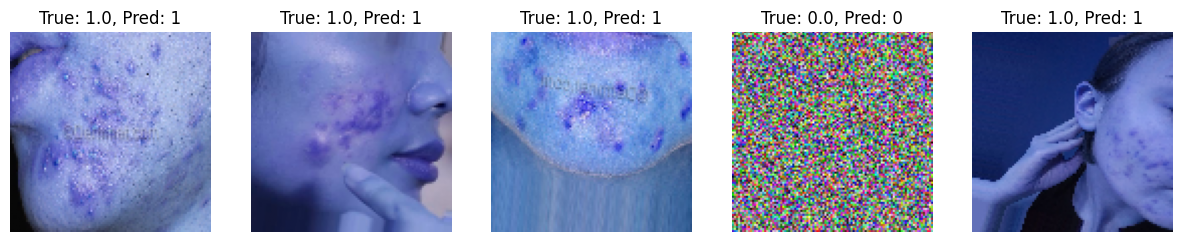

In [86]:
# Visualize predictions on validation data
def plot_predictions(X_val, y_val, y_val_pred_classes, num_images=5):
    plt.figure(figsize=(15, 10))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(X_val[i] / 255.0)  # Normalize for display
        plt.title(f'True: {y_val[i]}, Pred: {y_val_pred_classes[i]}')
        plt.axis('off')
    plt.show()

plot_predictions(X_val, y_val, y_val_pred_classes)

In [87]:
import joblib

# Save the trained model to a .pkl file
model_filename = 'acne_detection_model.pkl'
joblib.dump(model, model_filename)

['acne_detection_model.pkl']

In [88]:
from google.colab import files

# Download the model file
files.download(model_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [89]:
# After training your model
model.save('acne_detection_model.keras')

In [90]:
from google.colab import files

# Download the model file
files.download('acne_detection_model.keras')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>